In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

print(df.head())
print(df.info())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


In [5]:
print(df.describe())

       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


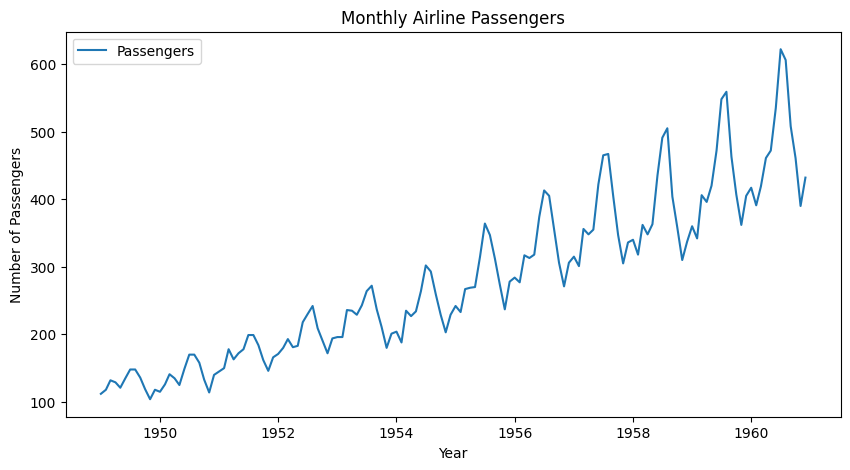

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df, label="Passengers")
plt.title("Monthly Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

In [7]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic: %f" % result[0])
    print("p-value: %f" % result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))

print("ADF Test on Original Series")
adf_test(df['Passengers'])

ADF Test on Original Series
ADF Statistic: 0.815369
p-value: 0.991880
Critical Value (1%): -3.482
Critical Value (5%): -2.884
Critical Value (10%): -2.579


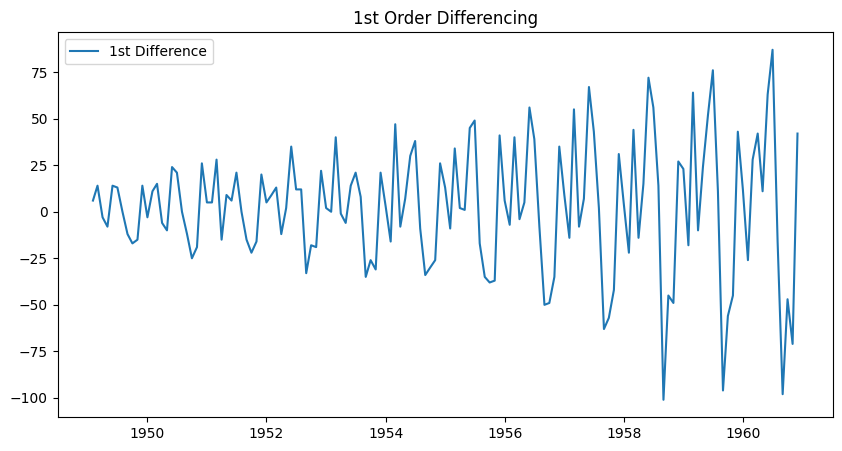

ADF Test on 1st Difference
ADF Statistic: -2.829267
p-value: 0.054213
Critical Value (1%): -3.482
Critical Value (5%): -2.884
Critical Value (10%): -2.579


In [8]:
df_diff = df['Passengers'].diff().dropna()

plt.figure(figsize=(10,5))
plt.plot(df_diff, label="1st Difference")
plt.title("1st Order Differencing")
plt.legend()
plt.show()

print("ADF Test on 1st Difference")
adf_test(df_diff)

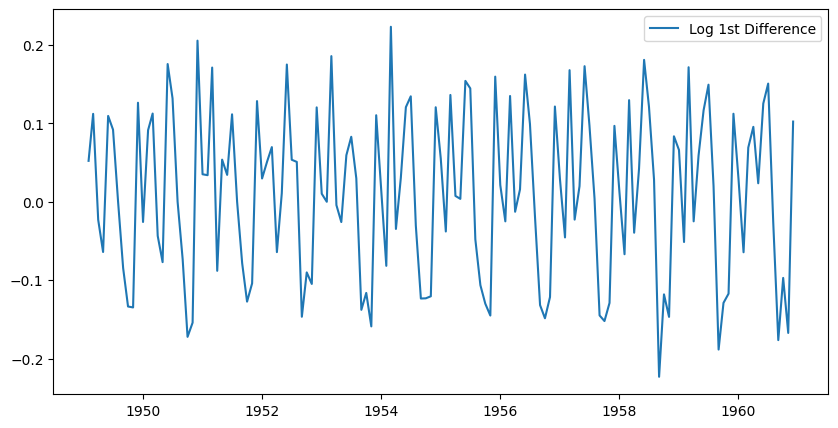

ADF Test on Log 1st Difference
ADF Statistic: -2.717131
p-value: 0.071121
Critical Value (1%): -3.483
Critical Value (5%): -2.884
Critical Value (10%): -2.579


In [9]:
df_log = np.log(df['Passengers'])
df_log_diff = df_log.diff().dropna()

plt.figure(figsize=(10,5))
plt.plot(df_log_diff, label="Log 1st Difference")
plt.legend()
plt.show()

print("ADF Test on Log 1st Difference")
adf_test(df_log_diff)

In [10]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

print("Train size:", len(train), "Test size:", len(test))

Train size: 115 Test size: 29


In [11]:
model = ARIMA(train['Passengers'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\archa\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\archa\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\archa\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Tue, 23 Sep 2025   AIC                           1057.516
Time:                        11:50:38   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

C:\Users\archa\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


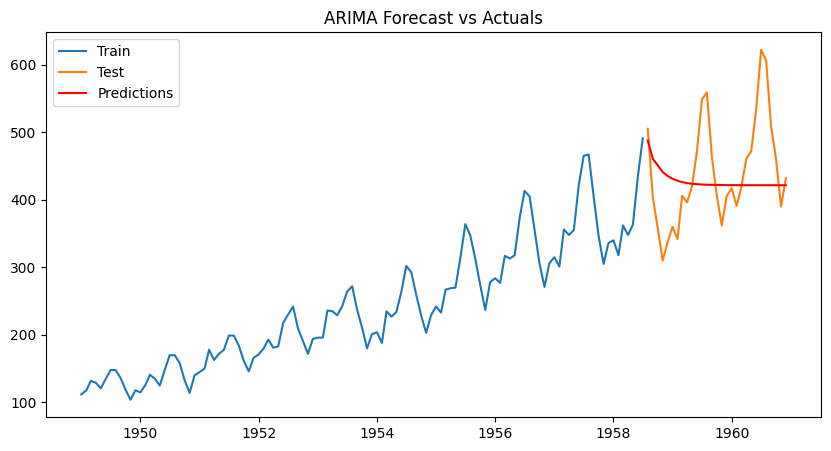

In [12]:
start = len(train)
end = len(train) + len(test) - 13

predictions = model_fit.predict(start=start, end=end, typ='levels')

plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(predictions, label="Predictions", color='red')
plt.title("ARIMA Forecast vs Actuals")
plt.legend()
plt.show()

In [13]:
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = math.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 6808.40
MAE: 63.55
RMSE: 82.51
